In [1]:
import numpy as np
import struct
import pickle
import matplotlib.pyplot as plt
from PIL import Image

#data load
def load_mnist(is_training=True):
    if is_training:
        fd = open('./Mnist/train-images.idx3-ubyte','rb')
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainX = loaded[16:].reshape((60000, 784)).astype(np.float32)

        fd = open('./Mnist/train-labels.idx1-ubyte','rb')
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trY = loaded[8:].reshape((60000)).astype(np.int32)

        #trX = trainX / 255.
        trX = trainX

        return trX, trY
    else:
        fd = open('./Mnist/t10k-images.idx3-ubyte','rb')
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teX = loaded[16:].reshape((10000, 784)).astype(np.float)

        fd = open('./Mnist/t10k-labels.idx1-ubyte','rb')
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teY = loaded[8:].reshape((10000)).astype(np.int32)

        #teX = teX / 255.
        teX = teX

        return teX, teY


/Users/shuniwase/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


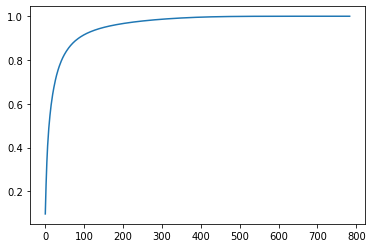

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def comb_imgs(origin_imgs, col, row, each_width, each_height, new_type):
    new_img = Image.new(new_type, (col* each_width, row* each_height))
    for i in range(len(origin_imgs)):
        each_img = array_to_img(np.array(origin_imgs[i]).reshape(each_width, each_width))
        new_img.paste(each_img, ((i % col) * each_width, (i // col) * each_width))
    return new_img

def array_to_img(array):
    #array=array*255
    new_img=Image.fromarray(array.astype(np.uint8))
    return new_img

X_train, y_train= load_mnist(is_training=True)
X_test, y_test= load_mnist(is_training=False)
low_train_img = comb_imgs(X_train, 100, 100, 28, 28, 'L')
origin_4_imgs = []
for i in range(10000):
     if y_train[i] == 4 and len(origin_4_imgs) < 10000:
        origin_4_imgs.append(X_train[i])

pca = PCA()
pca.fit(X_train)
accumulated_ratio_ = np.add.accumulate(pca.explained_variance_ratio_)
plt.plot(accumulated_ratio_)


In [25]:
pcadims = [1, 2, 4, 8, 16, 32, 64, 128, 256, 300, 350, 400, 450, 512, 764]
ccrs = []
for i in range(15):
    n_comp = pcadims[i]
    pca = PCA(n_components=n_comp)
    pca.fit(origin_4_imgs)
    X_train_latent = pca.transform(origin_4_imgs)
    X_train_inv = pca.inverse_transform(X_train_latent)
    #comb_imgs(X_train_inv, 25, 40, 28, 28, 'L').show()
    ccrs = pca.explained_variance_ratio_

for j in range(15):
    n = pcadims[j]
    print(str(n) + ':' + str(sum(ccrs[0:n])))

1:0.12764815885507233
2:0.22984025630855576
4:0.35995095923919596
8:0.5190637525995988
16:0.6744528088388245
32:0.7994125302466036
64:0.8934691834756888
128:0.9563163312945835
256:0.9912845291156072
300:0.9954851946402106
350:0.9981873879992053
400:0.999484021780799
450:0.999938168013708
512:1.0
764:1.0


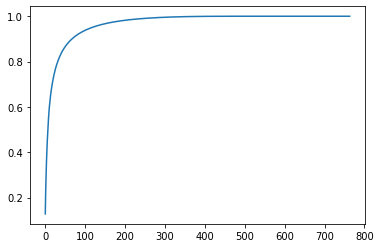

In [4]:
accumulated_ratio_ = np.add.accumulate(pca.explained_variance_ratio_)
plt.plot(accumulated_ratio_)

In [5]:
print(pca.explained_variace_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variace_ratio_'